# Introduction

WeRateDogs is a popular Hashtags in twitter where images of dogs are posted and users are requested to rate the image.Rating is always follow a certain criteria
where denominator is 10 and numerator greater than 10 depending on who is rating the dog image. We are going to wrangle the datasets which was provided by the
Udacity

# Table of contents

1 Data Gathering

    A.Importing twitter archive enhanced
    B.Programatic download image prediction
    C.Getting tweept data from API
2 Data Assessing

    A.Assessing twitter archive enhanced
    B.Assessing Image prediction
    C.Assessing twitter_json.txt
3 Data Cleaning

    A Tidyness Issues
    B Quality Issues
    
4 Storing  

5 Analysisng and Visualization
    

In [3]:
# importing of necessary libraries
import os 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np 
import requests as rt 
import tweepy
import os
import json 
import seaborn as sns

# Gathering

Step1 I downloaded the twitter-archieved-enhanced.csv file manually from the classroom resources
Step2 Download programmatically image-prediction.tsv file through python request with the help of url provided by udacity
Step3 I made application for important keys from twitter developer account where I was granted access keys;consumer_key,
         consumer_secret,access_token,access secret which I used to query twitter archieved for WeRateDogs data with the help
         of python libraryy tweepy.I saved the JSON data into a text file tweet_json.txt later read to pandas DataFrame and 
         finally save to a csv twitter_json.csv for easy assess.


In [4]:
# Downloading twitter-archive-enhanced.csv manually from internet
df_1=pd.read_csv('twitter-archive-enhanced.csv')


In [5]:
# Downloading twitter-archived-enhanced.csv file programmatically through requests
import requests
url='https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response=requests.get(url)
df=pd.read_csv(url,sep='\t')

In [20]:
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# Instructions for registering Twitter app and generating access tokens:
# https://www.slickremix.com/docs/how-to-get-api-keys-and-tokens-for-twitter/
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = consumer_key = 'HIDDEN'

access_token = consumer_key = 'HIDDEN'

access_secret = consumer_key = 'HIDDEN'


auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)


# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = df_1.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))        
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except:
            pass
end = timer()
print(end - start) 
print(fails_dict)

1: 892420643555336193
Success
2: 892177421306343426
Success
3: 891815181378084864
Success
4: 891689557279858688
Success
5: 891327558926688256
Success
6: 891087950875897856
Success
7: 890971913173991426
Success
8: 890729181411237888
9: 890609185150312448
10: 890240255349198849
Success
11: 890006608113172480
Success
12: 889880896479866881
Success
13: 889665388333682689
Success
14: 889638837579907072
Success
15: 889531135344209921
Success
16: 889278841981685760
Success
17: 888917238123831296
Success
18: 888804989199671297
Success
19: 888554962724278272
Success
20: 888202515573088257
21: 888078434458587136
Success
22: 887705289381826560
Success
23: 887517139158093824
Success
24: 887473957103951883
Success
25: 887343217045368832
Success
26: 887101392804085760
Success
27: 886983233522544640
Success
28: 886736880519319552
Success
29: 886680336477933568
Success
30: 886366144734445568
Success
31: 886267009285017600
Success
32: 886258384151887873
Success
33: 886054160059072513
Success
34: 885984

Rate limit reached. Sleeping for: 114


Success
945: 752682090207055872
946: 752660715232722944
Success
947: 752568224206688256
Success
948: 752519690950500352
Success
949: 752334515931054080
Success
950: 752309394570878976
Success
951: 752173152931807232
Success
952: 751950017322246144
Success
953: 751937170840121344
Success
954: 751830394383790080
Success
955: 751793661361422336
Success
956: 751598357617971201
Success
957: 751583847268179968
Success
958: 751538714308972544
Success
959: 751456908746354688
Success
960: 751251247299190784
961: 751205363882532864
Success
962: 751132876104687617
Success
963: 750868782890057730
Success
964: 750719632563142656
Success
965: 750506206503038976
Success
966: 750429297815552001
Success
967: 750383411068534784
Success
968: 750381685133418496
Success
969: 750147208377409536
Success
970: 750132105863102464
Success
971: 750117059602808832
Success
972: 750101899009982464
Success
973: 750086836815486976
Success
974: 750071704093859840
Success
975: 750056684286914561
Success
976: 75004162817

In [103]:
tweet

Status(_api=<tweepy.api.API object at 0x000001DA10152E50>, _json={'created_at': 'Sun Nov 15 22:32:08 +0000 2015', 'id': 666020888022790149, 'id_str': '666020888022790149', 'full_text': 'Here we have a Japanese Irish Setter. Lost eye in Vietnam (?). Big fan of relaxing on stair. 8/10 would pet https://t.co/BLDqew2Ijj', 'truncated': False, 'display_text_range': [0, 131], 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 666020881337073664, 'id_str': '666020881337073664', 'indices': [108, 131], 'media_url': 'http://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg', 'media_url_https': 'https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg', 'url': 'https://t.co/BLDqew2Ijj', 'display_url': 'pic.twitter.com/BLDqew2Ijj', 'expanded_url': 'https://twitter.com/dog_rates/status/666020888022790149/photo/1', 'type': 'photo', 'sizes': {'medium': {'w': 960, 'h': 720, 'resize': 'fit'}, 'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'large': {'w': 960, 'h': 720, 'resize':

In [6]:
# Reading json into DataFrame and saving to csv file
data = []
with open('tweet_json.txt') as s:    
        for line in s:         
             data.append(json.loads(line))
tweets = pd.DataFrame(data)
tweets.to_csv(r'tweets_json.csv',index=False,header=True)

In [7]:
# Converting list into dataframe.
tweets = pd.read_csv('tweets_json.csv')

In [8]:
# Selecting only 6 features from tweets dataframe for our data cleaning, analysis and visualization part.
tweet_df = tweets[['id','retweet_count','favorite_count']]

In [275]:
tweet_df

,id,retweet_count,favorite_count
0,892420643555336193,7020,33854
1,892177421306343426,5304,29360
2,891815181378084864,3487,22076
3,891689557279858688,7234,36973
4,891327558926688256,7773,35346
...,...,...,...
2195,666049248165822465,37,89
2196,666044226329800704,115,247
2197,666033412701032449,36,100
2198,666029285002620928,39,112


# ASSESSING

In this part I am going to visually assess the files with through .head(),.tail(),.sample() functions and the help of sublime text software and then programatically assess
the files by codes like .info(),.describe().isnull,.duplicated()

# Visual assesment

In [276]:
df_1.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [171]:
df_1.tail()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None


In [211]:
df_1.sample(15)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1583,687102708889812993,NaN,NaN,2016-01-13 02:43:46 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Army of water dogs here. None of them know whe...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/687102708...,5,10,None,None,None,None,None
1335,705239209544720384,NaN,NaN,2016-03-03 03:51:44 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Jimothy. He lost his body during the t...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/705239209...,11,10,Jimothy,None,None,None,None
276,840632337062862849,NaN,NaN,2017-03-11 18:35:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Maddie and Gunner. They are consi...,NaN,NaN,NaN,"https://www.gofundme.com/3hgsuu0,https://twitt...",12,10,Maddie,None,None,None,None
2325,666418789513326592,NaN,NaN,2015-11-17 00:53:15 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Walter. He is an Alaskan Terrapin. Lov...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666418789...,10,10,Walter,None,None,None,None
497,813142292504645637,NaN,NaN,2016-12-25 22:00:04 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Everybody stop what you're doing and look at t...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/813142292...,13,10,None,None,None,None,None
22,887517139158093824,NaN,NaN,2017-07-19 03:39:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I've yet to rate a Venezuelan Hover Wiener. Th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887517139...,14,10,such,None,None,None,None
964,750506206503038976,NaN,NaN,2016-07-06 01:46:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Malcolm. He's absolutely terrified of ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/750506206...,8,10,Malcolm,None,None,pupper,None
163,860276583193509888,NaN,NaN,2017-05-04 23:34:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Jordy. He likes to go on adventures an...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/860276583...,12,10,Jordy,None,None,None,None
2199,668779399630725120,NaN,NaN,2015-11-23 13:13:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Kevon. He is not physically or mentall...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/668779399...,10,10,Kevon,None,None,None,None
1666,682697186228989953,NaN,NaN,2015-12-31 22:57:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",NAAAAAAA ZAPENYAAAAA MABADI-CHIBAWAAA 12/10 ht...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/682697186...,12,10,None,None,None,None,None


In [173]:
df.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [174]:
df.tail()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False


In [196]:
df.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1307,753420520834629632,https://pbs.twimg.com/ext_tw_video_thumb/75342...,1,balloon,0.267961,False,lakeside,0.085764,False,rapeseed,0.040809,False
1960,866334964761202691,https://pbs.twimg.com/media/DAXXDQNXgAAoYQH.jpg,1,Samoyed,0.984086,True,Pomeranian,0.007919,True,keeshond,0.003328,True
364,672884426393653248,https://pbs.twimg.com/media/CVaQ0M4UsAAki3t.jpg,1,tusker,0.122410,False,warthog,0.119870,False,water_buffalo,0.105856,False
935,703407252292673536,https://pbs.twimg.com/media/CcMBJODUsAI5-A9.jpg,1,doormat,0.201058,False,turnstile,0.088583,False,carton,0.082924,False
1449,776201521193218049,https://pbs.twimg.com/media/CsWfKadWEAAtmlS.jpg,1,Rottweiler,0.502228,True,black-and-tan_coonhound,0.154594,True,bloodhound,0.135176,True
1466,778650543019483137,https://pbs.twimg.com/media/Cs5ShihWEAAH2ti.jpg,1,German_shepherd,0.515699,True,malinois,0.300292,True,kelpie,0.087022,True
698,684567543613382656,https://pbs.twimg.com/media/CYASi6FWQAEQMW2.jpg,1,minibus,0.401942,False,llama,0.229145,False,seat_belt,0.209393,False
615,680176173301628928,https://pbs.twimg.com/media/CXB4nWnWEAAhLTX.jpg,1,Christmas_stocking,0.207547,False,mask,0.193880,False,feather_boa,0.152738,False
199,669661792646373376,https://pbs.twimg.com/media/CUsd2TfWwAAmdjb.jpg,1,weasel,0.262802,False,Siamese_cat,0.148263,False,hamster,0.116374,False
1488,782305867769217024,https://pbs.twimg.com/media/CttPBt0WIAAcsDE.jpg,1,briard,0.504427,True,soft-coated_wheaten_terrier,0.390678,True,Lhasa,0.034596,True


In [178]:
tweet_df.head()

,id,retweet_count,favorite_count
0,892420643555336193,7020,33854
1,892177421306343426,5304,29360
2,891815181378084864,3487,22076
3,891689557279858688,7234,36973
4,891327558926688256,7773,35346


In [179]:
tweet_df.tail()

,id,retweet_count,favorite_count
2195,666049248165822465,37,89
2196,666044226329800704,115,247
2197,666033412701032449,36,100
2198,666029285002620928,39,112
2199,666020888022790149,423,2293


In [195]:
tweet_df.sample(10)

,id,retweet_count,favorite_count
872,750506206503038976,1056,4148
169,855860136149123072,853,4423
609,789960241177853952,3845,0
18,887343217045368832,8819,29618
831,756303284449767430,1008,3713
297,832636094638288896,2573,14937
1956,670727704916926465,314,738
107,869702957897576449,5392,25088
723,772826264096874500,2217,7574
859,751950017322246144,833,2853


# Programatic Assessment

In [277]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [183]:
df_1.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [185]:
df_1.duplicated().sum()

0

In [278]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [188]:
df.isnull().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

In [189]:
df.duplicated().sum()

0

In [190]:
tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   id              2200 non-null   int64
 1   retweet_count   2200 non-null   int64
 2   favorite_count  2200 non-null   int64
dtypes: int64(3)
memory usage: 51.7 KB


In [192]:
tweet_df.isnull().sum()

id                0
retweet_count     0
favorite_count    0
dtype: int64

In [194]:
tweet_df.duplicated().sum()

0

# Tidiness issues

1. there are four dog stages columns 'doggo','floofer','pupper','puppo'
  
2. All three datasets are related should be one dataset

# Quality issues 
#### twitter-archieved-enhanced
    .rows contains 181 retweets in 'retweeted_status_id','retweeted_status_user_id'
    .name columns contains invalid data this data should be named null as it cannot be removed
    .some tweets do not have rating for dogs
    .some denominators are bigger or smaller than 10
    .columns with alot of missing data;'in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id','retweeted_status_user_id',
    'retweeted_status_timestamp '
    .invalid timestamp 

#### prediction
    .conf should be renamed configuration
    .some rows contains dog'False'  I believe it contains non-dog image as predicted 
#### tweet-data
    . no isuue
  
 

# Cleaning

# Tidiness

In [9]:
twitter_enhanced = df_1.copy()
prediction = df.copy()
tweet_api = tweet_df.copy()

Define

 **1.Merge the four columns into one column dog_stage** 

Code

In [10]:
# extract dog stage from text column into new column dog_stage
twitter_enhanced['dog_stage'] = twitter_enhanced['text'].str.extract('(doggo|floofer|pupper|puppo)')


Test

In [281]:
twitter_enhanced.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,dog_stage
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None,NaN


In [282]:
twitter_enhanced['dog_stage'].value_counts()

pupper     265
doggo       93
puppo       37
floofer      4
Name: dog_stage, dtype: int64

In [11]:
# drop unrequired columns pupper,doggo,puppo,floofer
twitter_enhanced=twitter_enhanced.drop(columns=['pupper','doggo','puppo','floofer'],axis=1)
twitter_enhanced.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN


Define

2.confg should be renamed confidence

Code

In [12]:
prediction.rename(columns={'p1_conf':'p1_confidence','p2_conf':'p2_confidence','p3_conf':'p3_confidence'},inplace=True)

Test

In [108]:
prediction.head(3)

,tweet_id,jpg_url,img_num,p1,p1_confidence,p1_dog,p2,p2_confidence,p2_dog,p3,p3_confidence,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True


Define

**3.Combine the three datasets**

In [13]:
# id colum in tweet_api should be rename tweet_id
tweet_api=tweet_api.rename(columns={'id':'tweet_id'})

In [286]:
tweet_api.head(1)

,tweet_id,retweet_count,favorite_count
0,892420643555336193,7020,33854


Code

In [14]:
# merging three datasets with common character
tweet_final=pd.merge(twitter_enhanced,prediction,on='tweet_id',how='left')
tweet_final.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,img_num,p1,p1_confidence,p1_dog,p2,p2_confidence,p2_dog,p3,p3_confidence,p3_dog
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,1.0,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,1.0,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [15]:
tweet_final=pd.merge(tweet_final,tweet_api,on='tweet_id',how='left')

Test

In [256]:
tweet_final.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p3,p3_confidence,p3_dog,retweet_count_x,favorite_count_x,year,month,day,retweet_count_y,favorite_count_y
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7020.0,33854.0
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,papillon,0.069,True,5304.0,29360.0,2017.0,8.0,1.0,5304.0,29360.0


In [289]:
tweet_final.shape

(2356, 27)

In [290]:
tweet_final.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'dog_stage', 'jpg_url', 'img_num', 'p1',
       'p1_confidence', 'p1_dog', 'p2', 'p2_confidence', 'p2_dog', 'p3',
       'p3_confidence', 'p3_dog', 'retweet_count', 'favorite_count'],
      dtype='object')

In [45]:
tweet_final.head(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1_confidence,p1_dog,p2,p2_confidence,p2_dog,p3,p3_confidence,p3_dog,retweet_count,favorite_count
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,0.097049,False,bagel,0.085851,False,banana,0.07611,False,7020.0,33854.0


# Quality Cleaning

Define

**1.Drop retweet data we need original**

Code

In [16]:
tweet_final=tweet_final[tweet_final.retweeted_status_id.isnull()]

Test

In [292]:
tweet_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2175 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2175 non-null   object 
 4   source                      2175 non-null   object 
 5   text                        2175 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               2117 non-null   object 
 10  rating_numerator            2175 non-null   int64  
 11  rating_denominator          2175 non-null   int64  
 12  name                        2175 non-null   object 
 13  dog_stage                   364 n

In [17]:
# drop those columns
tweet_final=tweet_final.drop(columns=['retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp'])

In [294]:
tweet_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   tweet_id               2175 non-null   int64  
 1   in_reply_to_status_id  78 non-null     float64
 2   in_reply_to_user_id    78 non-null     float64
 3   timestamp              2175 non-null   object 
 4   source                 2175 non-null   object 
 5   text                   2175 non-null   object 
 6   expanded_urls          2117 non-null   object 
 7   rating_numerator       2175 non-null   int64  
 8   rating_denominator     2175 non-null   int64  
 9   name                   2175 non-null   object 
 10  dog_stage              364 non-null    object 
 11  jpg_url                1994 non-null   object 
 12  img_num                1994 non-null   float64
 13  p1                     1994 non-null   object 
 14  p1_confidence          1994 non-null   float64
 15  p1_d

Define

**2.Name column contains invalid data it should be renamed to Null as dropping this data can impact our datasets alot**

In [118]:
tweet_final.name.value_counts()

None          680
a              55
Lucy           11
Charlie        11
Cooper         10
             ... 
Wishes          1
Rose            1
Theo            1
Fido            1
Christoper      1
Name: name, Length: 956, dtype: int64

Code

In [18]:
#Repalce invalid name with NULL
i=['my','O','None','by','an','a']
for name in tweet_final.name:
    if name in i:
        tweet_final['name']=tweet_final['name'].replace(name,'NULL')

Test

In [296]:
tweet_final.name.value_counts()

NULL          744
Charlie        11
Lucy           11
Cooper         10
Oliver         10
             ... 
Rose            1
Theo            1
Fido            1
Emma            1
Christoper      1
Name: name, Length: 951, dtype: int64

In [121]:
tweet_final.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,...,p1_confidence,p1_dog,p2,p2_confidence,p2_dog,p3,p3_confidence,p3_dog,retweet_count,favorite_count
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,...,0.097049,False,bagel,0.085851,False,banana,0.076110,False,7020.0,33854.0
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,...,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,5304.0,29360.0


In [53]:
tweet_final.isnull().sum()

tweet_id                    0
in_reply_to_status_id    2097
in_reply_to_user_id      2097
timestamp                   0
source                      0
text                        0
expanded_urls              58
rating_numerator            0
rating_denominator          0
name                        0
dog_stage                1811
jpg_url                   181
img_num                   181
p1                        181
p1_confidence             181
p1_dog                    181
p2                        181
p2_confidence             181
p2_dog                    181
p3                        181
p3_confidence             181
p3_dog                    181
retweet_count             124
favorite_count            124
dtype: int64

In [19]:
# Drop columns with most missing data
tweet_final=tweet_final.drop(columns=['in_reply_to_status_id','in_reply_to_user_id'])

In [298]:
tweet_final.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'dog_stage',
       'jpg_url', 'img_num', 'p1', 'p1_confidence', 'p1_dog', 'p2',
       'p2_confidence', 'p2_dog', 'p3', 'p3_confidence', 'p3_dog',
       'retweet_count', 'favorite_count'],
      dtype='object')

Define

 **3.Remove denominators not equal to 10**

In [126]:
tweet_final.rating_denominator.value_counts()

10     2153
50        3
11        2
20        2
80        2
15        1
70        1
7         1
150       1
170       1
0         1
90        1
40        1
130       1
110       1
16        1
120       1
2         1
Name: rating_denominator, dtype: int64

Code

In [20]:
wrong_denominator =tweet_final.query('rating_denominator!=10').index
wrong_denominator

Int64Index([ 313,  342,  433,  516,  902, 1068, 1120, 1165, 1202, 1228, 1254,
            1274, 1351, 1433, 1598, 1634, 1635, 1662, 1663, 1779, 1843, 2335],
           dtype='int64')

In [21]:
# Drop rows with denominator !=10
tweet_final=tweet_final.drop(tweet_final.query('rating_denominator!=10').index)
tweet_final.query('rating_denominator!=10').index

Int64Index([], dtype='int64')

Test

In [129]:
tweet_final.rating_denominator.value_counts()

10    2153
Name: rating_denominator, dtype: int64

Define

**4.Change timestamp to year,month and day**

Code

In [22]:

tweet_final.timestamp=pd.to_datetime(tweet_final.timestamp)
tweet_final['year']=tweet_final['timestamp'].dt.year
tweet_final['month']=tweet_final['timestamp'].dt.month_name()
tweet_final['day']=tweet_final['timestamp'].dt.day_name()

# drop timestamp column
tweet_final=tweet_final.drop('timestamp',1)


C:\Users\HP\AppData\Local\Temp\ipykernel_7896\1294224252.py:7: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  tweet_final=tweet_final.drop('timestamp',1)


Test

In [302]:
tweet_final.head(5)

,tweet_id,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,jpg_url,img_num,...,p2_confidence,p2_dog,p3,p3_confidence,p3_dog,retweet_count,favorite_count,year,month,day
0,892420643555336193,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1.0,...,0.085851,False,banana,0.076110,False,7020.0,33854.0,2017,August,1
1,892177421306343426,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.0,...,0.090647,True,papillon,0.068957,True,5304.0,29360.0,2017,August,1
2,891815181378084864,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1.0,...,0.078253,True,kelpie,0.031379,True,3487.0,22076.0,2017,July,31
3,891689557279858688,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1.0,...,0.168086,True,spatula,0.040836,False,7234.0,36973.0,2017,July,30
4,891327558926688256,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2.0,...,0.225770,True,German_short-haired_pointer,0.175219,True,7773.0,35346.0,2017,July,29


Define

**5.Change denominator dtype to float**

In [23]:
tweet_final[['rating_numerator','rating_denominator']]=tweet_final[['rating_numerator','rating_denominator']].astype(float)

In [24]:
tweet_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2153 entries, 0 to 2355
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            2153 non-null   int64  
 1   source              2153 non-null   object 
 2   text                2153 non-null   object 
 3   expanded_urls       2099 non-null   object 
 4   rating_numerator    2153 non-null   float64
 5   rating_denominator  2153 non-null   float64
 6   name                2153 non-null   object 
 7   dog_stage           357 non-null    object 
 8   jpg_url             1976 non-null   object 
 9   img_num             1976 non-null   float64
 10  p1                  1976 non-null   object 
 11  p1_confidence       1976 non-null   float64
 12  p1_dog              1976 non-null   object 
 13  p2                  1976 non-null   object 
 14  p2_confidence       1976 non-null   float64
 15  p2_dog              1976 non-null   object 
 16  p3    

Define

**6.correct p1_configuration,p2_configuration and p3_configuration decimal points to 3**

Code

In [25]:
for p in ['p1_confidence','p2_confidence','p3_confidence']:
    tweet_final[p]=round(tweet_final[p],3)

Test

In [26]:
tweet_final[['p1_confidence','p2_confidence','p3_confidence']]

,p1_confidence,p2_confidence,p3_confidence
0,0.097,0.086,0.076
1,0.324,0.091,0.069
2,0.716,0.078,0.031
3,0.170,0.168,0.041
4,0.556,0.226,0.175
...,...,...,...
2351,0.560,0.244,0.155
2352,0.408,0.361,0.223
2353,0.596,0.139,0.116
2354,0.507,0.074,0.072


Define

**7. locate and take prediction where the three prediction is True for a dog**

In [27]:
# locating rows with False in p1_dog,p2_dog,p3_dog and where all three is False drop that row
tweet_final[['p1_dog','p2_dog','p3_dog']]

,p1_dog,p2_dog,p3_dog
0,False,False,False
1,True,True,True
2,True,True,True
3,False,True,False
4,True,True,True
...,...,...,...
2351,True,True,True
2352,True,True,True
2353,True,True,True
2354,True,True,True


In [28]:
# Resetting index of master_dataset.
tweet_final.reset_index(drop=True,inplace=True)

Define

**8.Remove tweets from three prediction which does not concur with dog prediction**

Code

In [29]:
# Filtering tweets with no predictions for dog as 'TRUE' in top three predictions.
tw=[]
for i in range(tweet_final.shape[0]):
    if (tweet_final['p1_dog'][i]== False) & (tweet_final['p2_dog'][i]==False) & (tweet_final['p3_dog'][i]==False):
        t = tweet_final.loc[i,:]
        tw.append(t)
no_dog = pd.DataFrame(tw)

In [311]:
no_dog

,tweet_id,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,jpg_url,img_num,...,p2_confidence,p2_dog,p3,p3_confidence,p3_dog,retweet_count,favorite_count,year,month,day
0,892420643555336193,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,NaN,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1.0,...,0.086,False,banana,0.076,False,7020.0,33854.0,2017,August,1
21,887517139158093824,"<a href=""http://twitter.com/download/iphone"" r...",I've yet to rate a Venezuelan Hover Wiener. Th...,https://twitter.com/dog_rates/status/887517139...,14.0,10.0,such,NaN,https://pbs.twimg.com/ext_tw_video_thumb/88751...,1.0,...,0.029,False,shopping_cart,0.026,False,9863.0,40766.0,2017,July,19
27,886680336477933568,"<a href=""http://twitter.com/download/iphone"" r...",This is Derek. He's late for a dog meeting. 13...,https://twitter.com/dog_rates/status/886680336...,13.0,10.0,Derek,NaN,https://pbs.twimg.com/media/DE4fEDzWAAAyHMM.jpg,1.0,...,0.140,False,car_wheel,0.044,False,3742.0,19758.0,2017,July,16
54,881268444196462592,"<a href=""http://twitter.com/download/iphone"" r...",Meet Elliot. He's a Canadian Forrest Pup. Unus...,https://twitter.com/dog_rates/status/881268444...,12.0,10.0,Elliot,NaN,https://pbs.twimg.com/media/DDrk-f9WAAI-WQv.jpg,1.0,...,0.246,False,ibex,0.056,False,4497.0,20502.0,2017,July,1
55,880935762899988482,"<a href=""http://twitter.com/download/iphone"" r...",This is Louis. He's crossing. It's a big deal....,https://twitter.com/dog_rates/status/880935762...,13.0,10.0,Louis,NaN,https://pbs.twimg.com/media/DDm2Z5aXUAEDS2u.jpg,1.0,...,0.115,False,traffic_light,0.070,False,2336.0,15066.0,2017,June,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2128,666362758909284353,"<a href=""http://twitter.com/download/iphone"" r...",Unique dog here. Very small. Lives in containe...,https://twitter.com/dog_rates/status/666362758...,6.0,10.0,NULL,NaN,https://pbs.twimg.com/media/CT9lXGsUcAAyUFt.jpg,1.0,...,0.002,False,hamster,0.000,False,471.0,651.0,2015,November,16
2132,666293911632134144,"<a href=""http://twitter.com/download/iphone"" r...",This is a funny dog. Weird toes. Won't come do...,https://twitter.com/dog_rates/status/666293911...,3.0,10.0,NULL,NaN,https://pbs.twimg.com/media/CT8mx7KW4AEQu8N.jpg,1.0,...,0.015,False,great_grey_owl,0.013,False,291.0,427.0,2015,November,16
2134,666268910803644416,"<a href=""http://twitter.com/download/iphone"" r...",Very concerned about fellow dog trapped in com...,https://twitter.com/dog_rates/status/666268910...,10.0,10.0,NULL,NaN,https://pbs.twimg.com/media/CT8QCd1WEAADXws.jpg,1.0,...,0.086,False,bookcase,0.079,False,38.0,100.0,2015,November,16
2135,666104133288665088,"<a href=""http://twitter.com/download/iphone"" r...",Not familiar with this breed. No tail (weird)....,https://twitter.com/dog_rates/status/666104133...,1.0,10.0,NULL,NaN,https://pbs.twimg.com/media/CT56LSZWoAAlJj2.jpg,1.0,...,0.034,False,partridge,0.000,False,5494.0,12916.0,2015,November,16


In [30]:
# remove no dog data from the dataframe
tweet_final=tweet_final.drop(index=no_dog.index,axis=1)

Test

In [31]:
tweet_final[['p1_dog','p2_dog','p3_dog']]

,p1_dog,p2_dog,p3_dog
1,True,True,True
2,True,True,True
3,False,True,False
4,True,True,True
5,True,True,False
...,...,...,...
2148,True,True,True
2149,True,True,True
2150,True,True,True
2151,True,True,True


In [314]:
tweet_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1846 entries, 1 to 2152
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            1846 non-null   int64  
 1   source              1846 non-null   object 
 2   text                1846 non-null   object 
 3   expanded_urls       1792 non-null   object 
 4   rating_numerator    1846 non-null   float64
 5   rating_denominator  1846 non-null   float64
 6   name                1846 non-null   object 
 7   dog_stage           306 non-null    object 
 8   jpg_url             1669 non-null   object 
 9   img_num             1669 non-null   float64
 10  p1                  1669 non-null   object 
 11  p1_confidence       1669 non-null   float64
 12  p1_dog              1669 non-null   object 
 13  p2                  1669 non-null   object 
 14  p2_confidence       1669 non-null   float64
 15  p2_dog              1669 non-null   object 
 16  p3    

In [32]:
# lets take necessary columns important for analysis and visualization
tweet_clean=tweet_final[['tweet_id','rating_numerator','rating_denominator', 'name', 'dog_stage','p1',
       'p1_confidence', 'p1_dog', 'p2', 'p2_confidence', 'p2_dog', 'p3',
       'p3_confidence', 'p3_dog', 'retweet_count', 'favorite_count', 'year',
       'month', 'day']]

In [316]:
tweet_clean.head(3)

,tweet_id,rating_numerator,rating_denominator,name,dog_stage,p1,p1_confidence,p1_dog,p2,p2_confidence,p2_dog,p3,p3_confidence,p3_dog,retweet_count,favorite_count,year,month,day
1,892177421306343426,13.0,10.0,Tilly,NaN,Chihuahua,0.324,True,Pekinese,0.091,True,papillon,0.069,True,5304.0,29360.0,2017,August,1
2,891815181378084864,12.0,10.0,Archie,NaN,Chihuahua,0.716,True,malamute,0.078,True,kelpie,0.031,True,3487.0,22076.0,2017,July,31
3,891689557279858688,13.0,10.0,Darla,NaN,paper_towel,0.170,False,Labrador_retriever,0.168,True,spatula,0.041,False,7234.0,36973.0,2017,July,30


# Storing of cleaned data

In [43]:
# storing of final clean copy
tweet_clean.to_csv('twitter_archive_master.csv',index=False)

# Analysis and Visualization

In [318]:
tweet_clean.describe()

,tweet_id,rating_numerator,rating_denominator,p1_confidence,p2_confidence,p3_confidence,retweet_count,favorite_count,year,day
count,1.846000e+03,1846.000000,1846.0,1669.000000,1669.000000,1669.000000,1734.000000,1734.000000,1846.000000,1846.000000
mean,7.406006e+17,11.612676,10.0,0.604846,0.137527,0.061289,2287.873702,7847.008651,2015.904117,15.892741
std,6.802857e+16,18.561289,0.0,0.266466,0.101385,0.051746,4183.999106,11680.242400,0.690638,8.848584
min,6.660209e+17,0.000000,10.0,0.044000,0.000000,0.000000,1.000000,45.000000,2015.000000,1.000000
25%,6.786596e+17,10.000000,10.0,0.379000,0.055000,0.016000,487.750000,1737.500000,2015.000000,8.000000
50%,7.152104e+17,11.000000,10.0,0.606000,0.122000,0.050000,1122.500000,3565.000000,2016.000000,16.000000
75%,7.934473e+17,12.000000,10.0,0.849000,0.199000,0.095000,2596.000000,9573.250000,2016.000000,24.000000
max,8.921774e+17,666.000000,10.0,1.000000,0.468000,0.271000,70855.000000,145055.000000,2017.000000,31.000000


# Dominant Dog Stage

In [236]:
tweet_clean.dog_stage.value_counts()

pupper     198
doggo       73
puppo       31
floofer      4
Name: dog_stage, dtype: int64

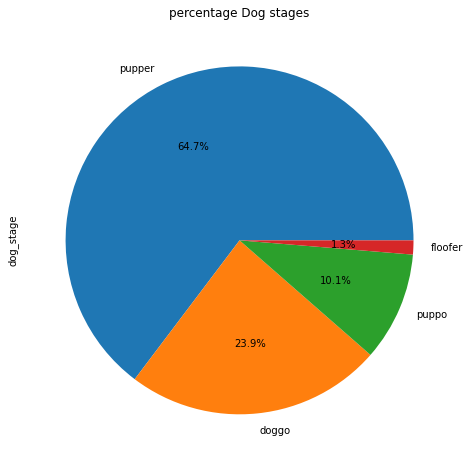

In [237]:
tweet_clean.dog_stage.value_counts().plot(kind='pie',figsize=(8,8),autopct='%1.1f%%',title='percentage Dog stages');

 Pupper is dominant among the four dog stages while
 Floofer has the least percentage

# Tweets vs Year,Month & Day

 # Tweets vs Year

In [238]:
tweet_clean.year.value_counts()

2016    949
2015    537
2017    360
Name: year, dtype: int64

Text(0, 0.5, 'Tweets')

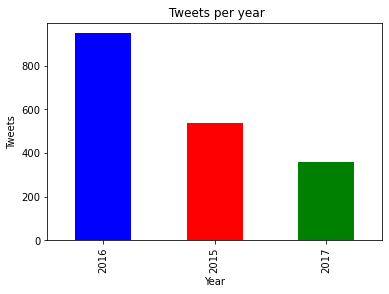

In [391]:
tweet_clean.year.value_counts().plot.bar(color=['blue','red','green']);
plt.title(' Tweets per year')
plt.xlabel('Year')
plt.ylabel('Tweets')


# Which month has the most Tweets

In [320]:
tweet_clean.month.value_counts()

December     364
November     279
January      224
February     174
March        173
July         136
June         128
April         96
May           89
October       68
September     63
August        52
Name: month, dtype: int64

Text(0, 0.5, 'Counts')

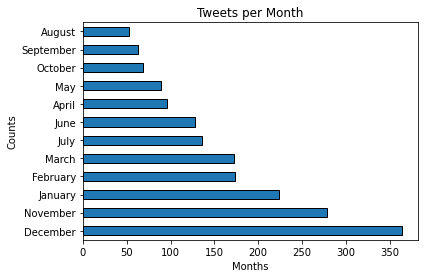

In [408]:
tweet_clean.month.value_counts().plot.barh(edgecolor='black',rot=0)
plt.title('Tweets per Month')
plt.xlabel('Months')
plt.ylabel('Counts')

In [322]:
tweet_clean.groupby('year')['month'].value_counts()

year  month    
2015  December     308
      November     229
2016  January      161
      March        120
      February     108
      July          86
      June          81
      October       68
      September     63
      December      56
      April         54
      August        51
      May           51
      November      50
2017  February      66
      January       63
      March         53
      July          50
      June          47
      April         42
      May           38
      August         1
Name: month, dtype: int64

Text(0, 0.5, 'Tweets')

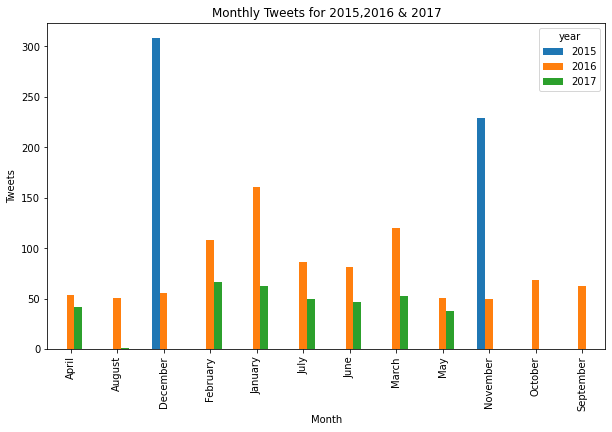

In [371]:
tweet_clean.groupby('year')['month'].value_counts().unstack('year').plot(kind='bar',figsize=(10,6));
plt.title('Monthly Tweets for 2015,2016 & 2017')
plt.xlabel('Month')
plt.ylabel('Tweets')

In [325]:
ax=tweet_clean.query('year ==2016')
ax

,tweet_id,rating_numerator,rating_denominator,name,dog_stage,p1,p1_confidence,p1_dog,p2,p2_confidence,p2_dog,p3,p3_confidence,p3_dog,retweet_count,favorite_count,year,month,day
396,814986499976527872,11.0,10.0,Cooper,pupper,dalmatian,1.000,True,boxer,0.000,True,American_Staffordshire_terrier,0.000,True,1189.0,7261.0,2016,December,31
397,814638523311648768,12.0,10.0,Olivia,NaN,golden_retriever,0.651,True,kuvasz,0.053,True,cocker_spaniel,0.035,True,2530.0,10707.0,2016,December,30
398,814530161257443328,12.0,10.0,Alf,NaN,miniature_poodle,0.627,True,toy_poodle,0.266,True,soft-coated_wheaten_terrier,0.042,True,1743.0,8225.0,2016,December,29
399,814153002265309185,12.0,10.0,Oshie,NaN,golden_retriever,0.490,True,Labrador_retriever,0.292,True,chow,0.072,True,8124.0,27295.0,2016,December,28
400,813910438903693312,11.0,10.0,Chubbs,doggo,Siberian_husky,0.699,True,Eskimo_dog,0.256,True,Norwegian_elkhound,0.013,True,1737.0,8861.0,2016,December,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1462,683111407806746624,10.0,10.0,Larry,pupper,cocker_spaniel,0.901,True,soft-coated_wheaten_terrier,0.029,True,miniature_schnauzer,0.018,True,821.0,3152.0,2016,January,2
1463,683098815881154561,12.0,10.0,NULL,NaN,golden_retriever,0.890,True,kuvasz,0.053,True,Labrador_retriever,0.038,True,590.0,2003.0,2016,January,2
1464,683078886620553216,9.0,10.0,NULL,pupper,koala,0.141,False,Eskimo_dog,0.094,True,wallaby,0.085,False,520.0,1861.0,2016,January,2
1465,683030066213818368,10.0,10.0,Lulu,NaN,boxer,0.722,True,bull_mastiff,0.194,True,French_bulldog,0.055,True,672.0,2001.0,2016,January,1


In [326]:
ax['month'].value_counts()

January      161
March        120
February     108
July          86
June          81
October       68
September     63
December      56
April         54
August        51
May           51
November      50
Name: month, dtype: int64

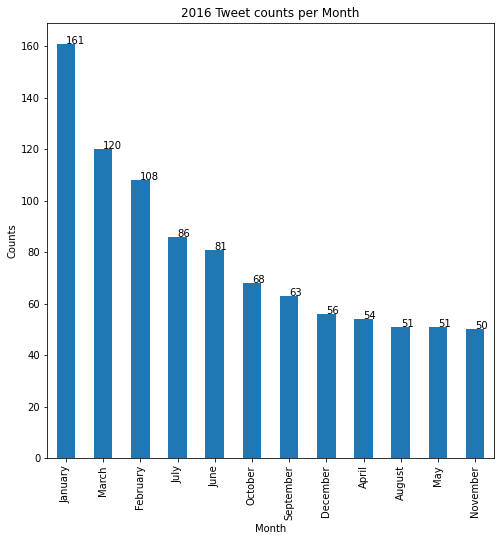

In [407]:
ax['month'].value_counts().plot(kind='bar',figsize=(8,8))
plt.title('2016 Tweet counts per Month')
plt.xlabel('Month')
plt.ylabel('Counts')
data=ax['month'].value_counts()
for index,data in enumerate(data):
    plt.text(x=index,y=data,s=data)
    


Text(0, 0.5, 'Counts')

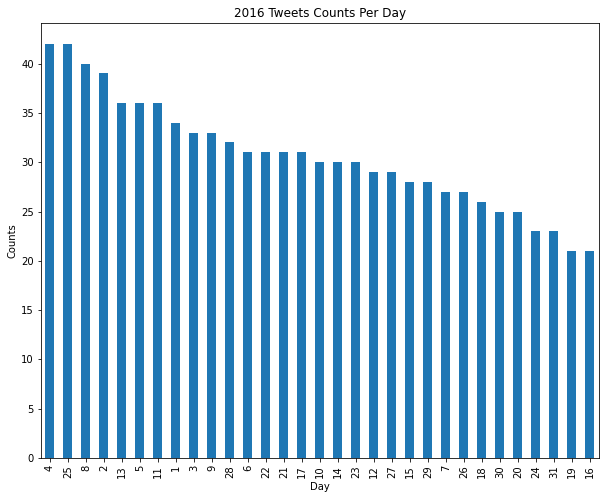

In [377]:
ax['day'].value_counts().plot(kind='bar',figsize=(10,8))
plt.title('2016 Tweets counts per Day'.title())
plt.xlabel('Day'.title())
plt.ylabel('Counts'.title())

# Relationship between tweet count and favorite count

Text(0, 0.5, 'retweet_count')

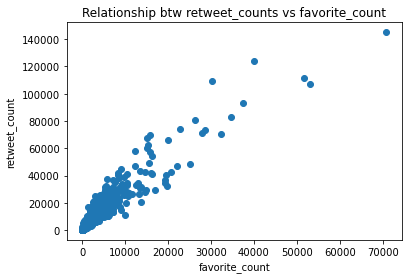

In [34]:
plt.scatter(tweet_clean.retweet_count,tweet_clean.favorite_count)
plt.title('Relationship btw retweet_counts vs favorite_count')
plt.xlabel('favorite_count')
plt.ylabel('retweet_count')

<AxesSubplot:xlabel='favorite_count', ylabel='retweet_count'>

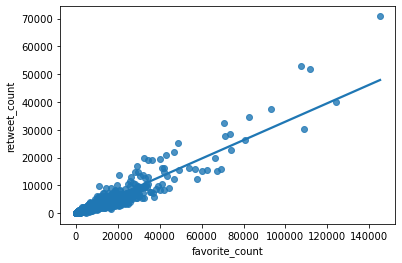

In [51]:
tips=pd.read_csv('twitter_archive_master.csv')
sns.regplot(x='favorite_count',y='retweet_count',data=tips,ci=None)

There is linear relationship btw retweet count and favorite count

In [999]:
tweet_clean.name.value_counts()

NULL              587
Lucy               11
Cooper             10
Charlie            10
Tucker              9
Oliver              9
the                 8
Penny               8
Winston             7
Daisy               7
Sadie               7
Lola                7
Toby                6
Oscar               6
Koda                6
Jax                 6
Bentley             5
Bella               5
Leo                 5
Stanley             5
Bo                  5
Rusty               5
Bailey              5
Jack                4
Cassie              4
Dave                4
Scooter             4
Milo                4
Louis               4
Sophie              4
Reggie              4
Duke                4
Finn                4
Dexter              4
Alfie               4
Boomer              4
Scout               4
Bear                4
Sammy               4
Chester             4
Brody               4
Larry               4
Gus                 4
Maggie              4
Jeffrey             4
George    

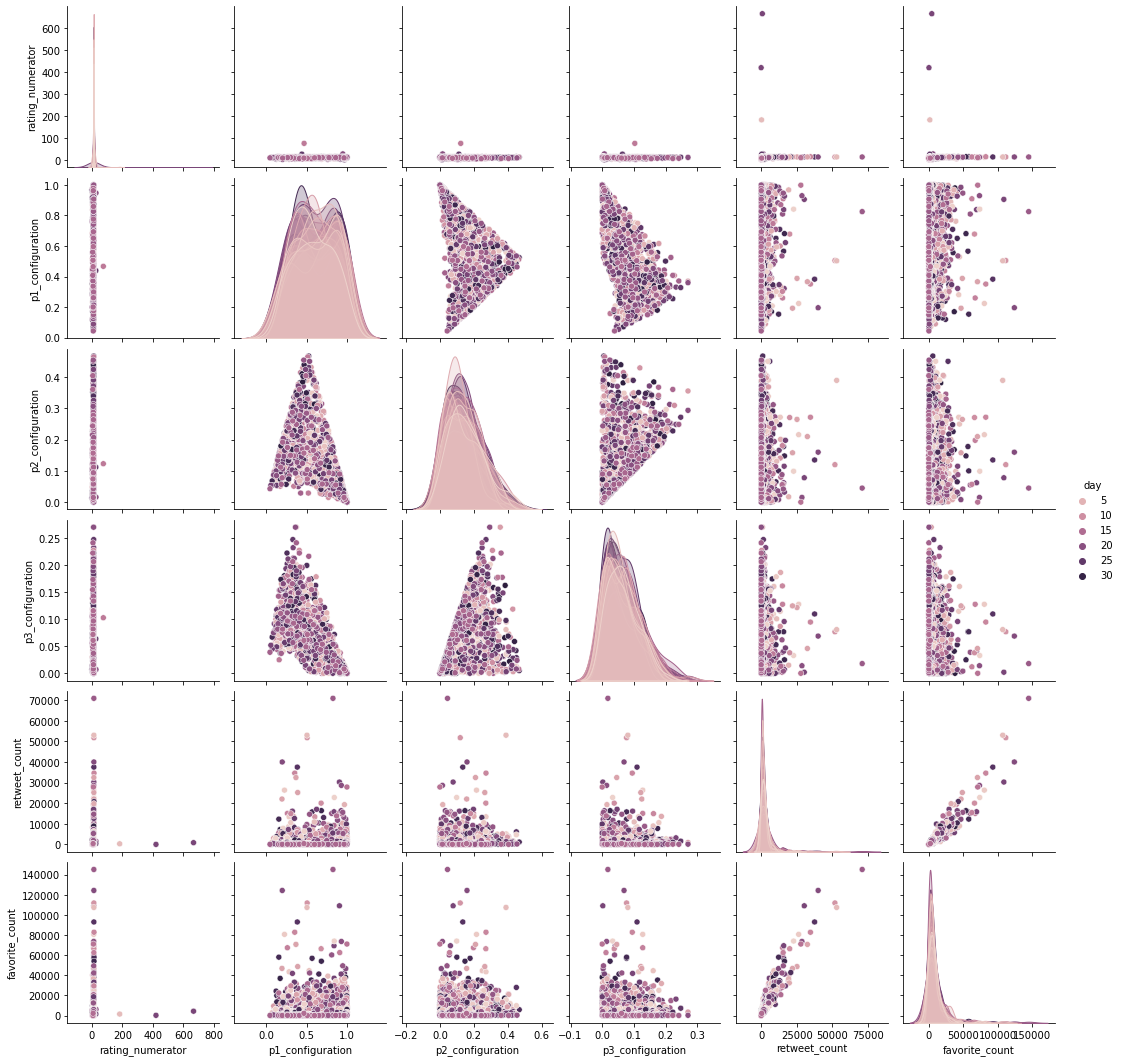

In [1056]:
sns.pairplot(tweet_clean,vars=['rating_numerator','p1_configuration','p2_configuration','p3_configuration',
                              'retweet_count','favorite_count'],hue='day'); 


 # Which dog name is most popular

In [380]:
dog_name = tweet_clean[tweet_clean['name'] !='NULL']

In [381]:
dog_name.name.value_counts()[0:10]

Lucy       11
Cooper     10
Charlie    10
Tucker      9
Oliver      9
the         8
Penny       8
Winston     7
Daisy       7
Sadie       7
Name: name, dtype: int64

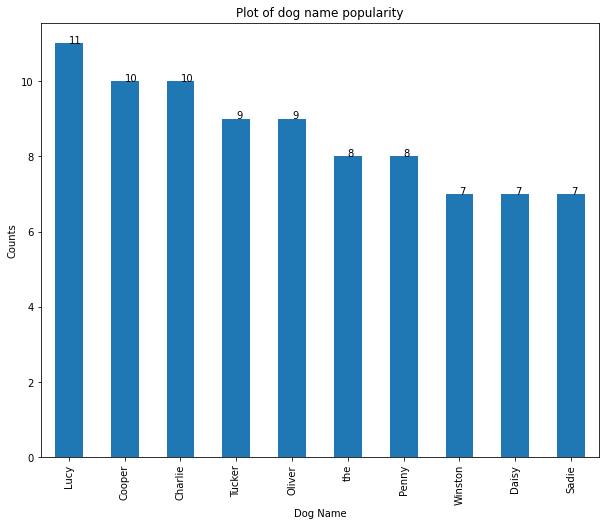

In [404]:
dog_name.name.value_counts()[0:10].plot.bar(figsize=(10,8))
plt.title('Plot of dog name popularity')
plt.xlabel('Dog Name')
plt.ylabel('Counts')
data=dog_name.name.value_counts()[0:10]
for index, data in enumerate(data):
    plt.text(x=index,y=data,s=data)